# Assignment 1: k-Nearest Neighbors
### ip222gs

## Exercise 2: k-NN Regression

In [16]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['pcolor.shading'] ='nearest'

In [17]:
# read csv and save output as numpy array
poly = np.loadtxt('polynomial200.csv', delimiter=',')

In [18]:
poly.shape

(200, 2)

### Task 1. Divide the dataset into a training set of size 100, and test set of size 100

In [19]:
# shuffle the rows and split the data
np.random.shuffle(poly)
train, test = np.split(poly, [int(0.5*(poly.shape[0]))])

'''
using proposal from:
https://towardsdatascience.com/k-nearest-neighbors-classification-from-scratch-with-numpy-cb222ecfeac1
'''

'\nusing proposal from:\nhttps://towardsdatascience.com/k-nearest-neighbors-classification-from-scratch-with-numpy-cb222ecfeac1\n'

### Task 2. Plot the training and test set side-by-side in a 1 x 2 pattern.

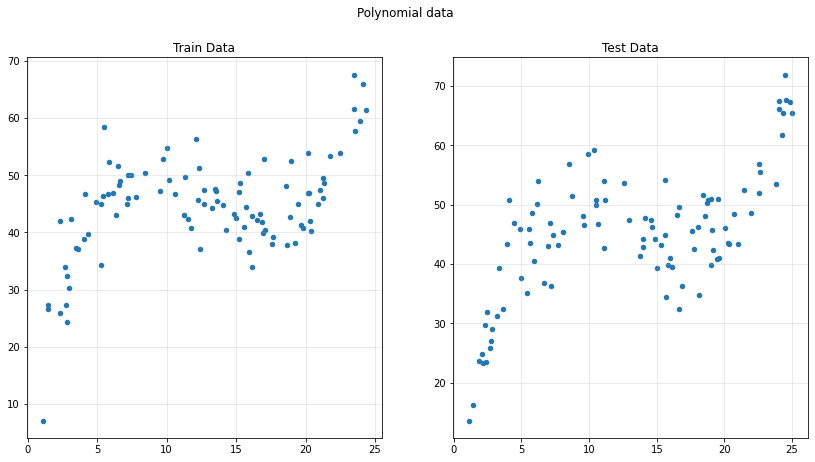

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
fig.suptitle("Polynomial data")

ax1.scatter(train[:, 0], train[:, 1], s=20)
ax1.set_title('Train Data')
ax1.grid(True)

ax2.scatter(test[:, 0], test[:, 1], s=20)
ax2.set_title('Test Data')
ax2.grid(True)

plt.show()

### Task 3. Display a 2 x 2 plot showing the k-NN regression result and the MSE training error for k = 1, 3, 5, 7

In [21]:
grid_size = 100
X_range = np.linspace(train[:, 0].min(), train[:, 0].max(), grid_size)
X_range = np.vstack(X_range)

In [22]:
# Function to find k nearest neighbors to given data point

def knn_regression(x, k=1):
    global train
    # Calculate difference between given x value and x value in train dataset
    dist = []
    for row in train:
        dist.append(abs(row[0] - x))

    # Create a new array with distances and add it to the existing array
    arr = np.array(dist)
    arr = np.vstack(arr)
    train_pred = np.concatenate((train, arr), axis = 1)

    # Sort the calculated distances in ascending order based on distance values
    train_pred = train_pred[np.argsort(train_pred[:, 2])]

    # Get top k rows from the sorted list
    data_top_k = train_pred[:k]

    # Get mean y value from top k rows
    Y_pred = np.mean(data_top_k[:, 1])

    return Y_pred

In [23]:
#  function to apply knn_regression to the complete array

def knn_y(data, k_neigh):
    return [round(knn_regression(item[0], k=k_neigh), 6) for item in data]

In [24]:
# split arrays for x and y values from the train dataset
x_train_actual = np.vstack(train[:, 0])
y_train_actual = np.vstack(train[:, 1])

In [25]:
# apply function to calculate predicated y values based on actual x values and k number of neighbours
y_pred_1 = np.vstack(knn_y(x_train_actual, 1))
y_pred_3 = np.vstack(knn_y(x_train_actual, 3))
y_pred_5 = np.vstack(knn_y(x_train_actual, 5))
y_pred_7 = np.vstack(knn_y(x_train_actual, 7))

In [26]:
# function to calculate mean squared error
def mean_square_error(y_act, y_pred):
     return np.square(y_act - y_pred).mean()

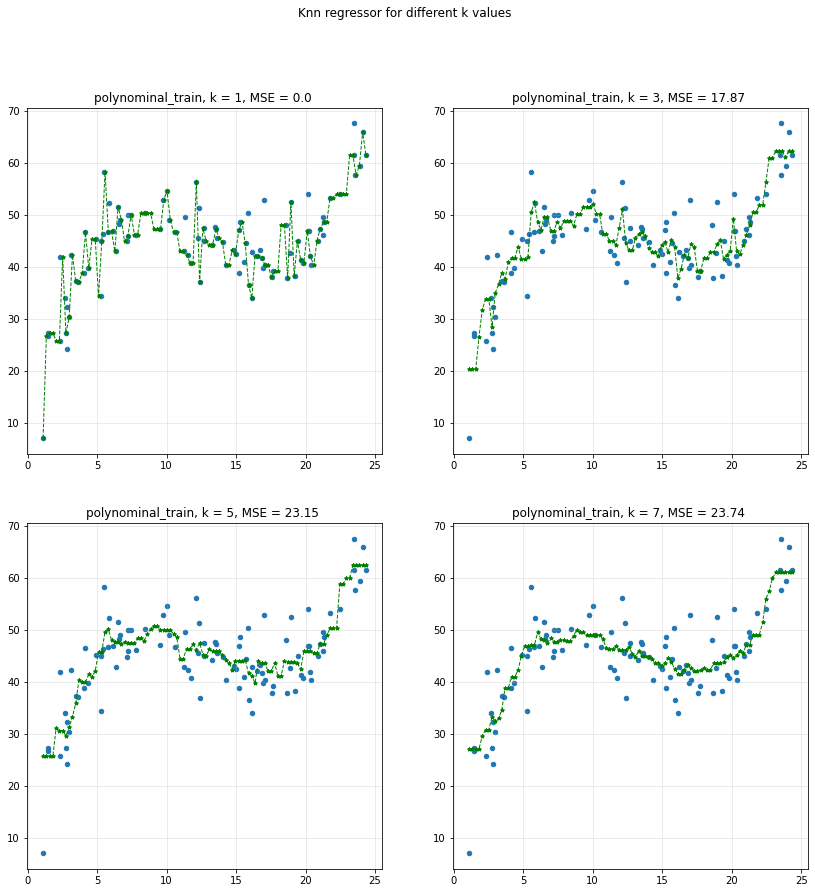

In [27]:
# plot the figures
fig, axs = plt.subplots(2, 2, figsize=(14, 14))
fig.suptitle('Knn regressor for different k values')

ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]

ax1.scatter(train[:, 0], train[:, 1], s=20)
ax1.plot(X_range, knn_y(X_range, 1), 'g*--', linewidth=1, markersize=4)
ax1.set_title('Train Data')
ax1.grid(True)
ax1.set_title(f'polynominal_train, k = 1, MSE = {round(mean_square_error(y_train_actual, y_pred_1), 2)} ')

ax2.scatter(train[:, 0], train[:, 1], s=20)
ax2.plot(X_range, knn_y(X_range, 3), 'g*--', linewidth=1, markersize=4)
ax2.set_title('Train Data')
ax2.grid(True)
ax2.set_title(f'polynominal_train, k = 3, MSE = {round(mean_square_error(y_train_actual, y_pred_3), 2)} ')

ax3.scatter(train[:, 0], train[:, 1], s=20)
ax3.plot(X_range, knn_y(X_range, 5), 'g*--', linewidth=1, markersize=4)
ax3.set_title('Train Data')
ax3.grid(True)
ax3.set_title(f'polynominal_train, k = 5, MSE = {round(mean_square_error(y_train_actual, y_pred_5), 2)} ')

ax4.scatter(train[:, 0], train[:, 1], s=20)
ax4.plot(X_range, knn_y(X_range, 7), 'g*--', linewidth=1, markersize=4)
ax4.set_title('Train Data')
ax4.grid(True)
ax4.set_title(f'polynominal_train, k = 7, MSE = {round(mean_square_error(y_train_actual, y_pred_7), 2)} ')

plt.show()

Use of K=1 shows 0 MSE error, which could sound as a good result in theory, but in reality that means that models predicts all values on train dataset. More valuable results will be provided in the next task.

### Task 4. Compute and present the MSE test error for k = 1, 3, 5, 7

In [28]:
# split arrays for x and y values from the test dataset
x_test_actual = np.vstack(test[:, 0])
y_test_actual = np.vstack(test[:, 1])

In [29]:
# MSE test error for k = 1, 3, 5, 7
for i in range(1, 9, 2):
    print (f' for {i} neighbours the MSE for test dataset is equal to {round(mean_square_error(y_test_actual, np.vstack(knn_y(x_test_actual, i))), 2)}')

 for 1 neighbours the MSE for test dataset is equal to 42.78
 for 3 neighbours the MSE for test dataset is equal to 33.06
 for 5 neighbours the MSE for test dataset is equal to 31.66
 for 7 neighbours the MSE for test dataset is equal to 32.02


Current evaluation shows the best (lowest) MSE for k number of neighbours of 5**. Let us try to check further values to ensure the lowest MSE

** tend to change due to random nature of data (data is shuffled)

 ### Task 5. Which k gives the best regression? 

In [30]:
# Let us check the MSE values for k value in range 1-19 
for i in range(1, 20, 2):
    print (f' for {i} neighbours the MSE is {round(mean_square_error(y_test_actual, np.vstack(knn_y(x_test_actual, i))), 2)}')

 for 1 neighbours the MSE is 42.78
 for 3 neighbours the MSE is 33.06
 for 5 neighbours the MSE is 31.66
 for 7 neighbours the MSE is 32.02
 for 9 neighbours the MSE is 35.31
 for 11 neighbours the MSE is 38.21
 for 13 neighbours the MSE is 42.42
 for 15 neighbours the MSE is 48.82
 for 17 neighbours the MSE is 50.64
 for 19 neighbours the MSE is 54.16


Based on current calculation it seems that the lowest MSE can be achieved by using k number of neighbours equal to 9**.

** tend to change based on random nature of input data

